# Notebook to check data is as it should be before turning to tensors 

In [1]:
import torch
from torchvision.transforms import ToTensor
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from torch.utils.data import Dataset
import os.path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
#sourcepath is path to folder that has all tiff files.
# they must have value 111 for NA, and last tif file should come as last_year_1 for band 1 in year = year 
#wherepath is the path to folder where the tensors to be saved and laded later

# server = '/home/ubuntu/satellite' # for Amazon server
#server = '/rds/general/project/aandedemand/live/satellite/junin'  # For Imperial HPC
region = "Madre"

sourcepath = '../outputs/' + region
wherepath = '/data/' + region

#sourcepath = server + sourcepath
#wherepath = server + wherepath
print(sourcepath, wherepath)

../outputs/Madre /data/Madre


In [2]:
def to_Tensor(path,name):
    """
    Load Tiff files as tensors
    """
    t = Image.open(path+"/"+name)
    t = ToTensor()(t)
    t = t.squeeze(dim = 0)
    return(t)  

<Figure size 1008x1008 with 0 Axes>

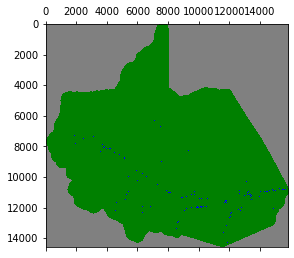

Number of pixels in AOI and buffer with no data (0 entries):  0


In [5]:
"""
datamask:
    -1 for NA value
    0 for no data pixel in Madre de Dios
    1 for land pixel in Madre de Dios
    2 for water body pixel in Madre de Dios 
"""
#Run this:
###############
datamask = to_Tensor(sourcepath,'datamask_2019.tif')
##############

#visualise:
colors = ['grey','white','green','blue']
plt.fig = plt.figure(figsize=(14,14))
plt.matshow(datamask,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()
print("Number of pixels in AOI and buffer with no data (0 entries): ", len((datamask == 0).nonzero()))

<Figure size 576x576 with 0 Axes>

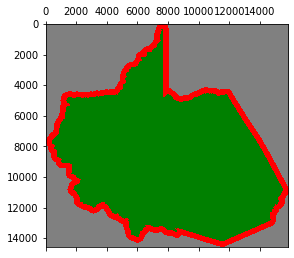

In [7]:
"""
Buffer:
    -1 for NA value
    0 for pixel in Madre de Dios
    1 for pixel in buffer
"""
buffer = to_Tensor(sourcepath,'buffer.tif')
#to visualise
colors = ['grey','green','red']
plt.fig = plt.figure(figsize=(8,8))
plt.matshow(buffer,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [5]:
def last_to_image(path,year):
    """
    Given path to folder having tiff files for each last band for given year
    returns Tensors with chanels == bands and year as requested in the path
    """
    image = [] 
    for b in range(1,5):
        band = Image.open(path+"/"+'last_20%d_%d.tif'%(year,b))
        band = ToTensor()(band)
        image.append(band)
    image = torch.cat(image,dim = 0)
    image = image.float()
    return(image)

In [6]:
last_19 = last_to_image(sourcepath,19)

In [8]:
pixels = (last_19[1,:,:] != -1).nonzero()
values1 = last_19[0, pixels[:,0] , pixels[:,1]].view(-1)
values2 = last_19[1, pixels[:,0] , pixels[:,1]].view(-1)
values3 = last_19[2, pixels[:,0] , pixels[:,1]].view(-1)
values4 = last_19[3, pixels[:,0] , pixels[:,1]].view(-1)

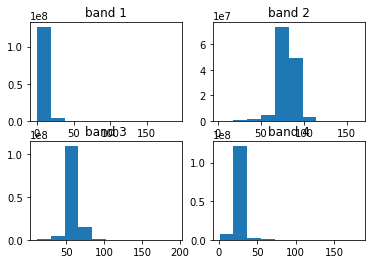

In [9]:
plt.fig = plt.figure()
plt.subplot(2, 2, 1)
plt.hist(values1.numpy())
plt.title("band 1")
plt.subplot(2, 2, 2)
plt.hist(values2.numpy())
plt.title("band 2")
plt.subplot(2, 2, 3)
plt.hist(values3.numpy())
plt.title("band 3")
plt.subplot(2, 2, 4)
plt.hist(values4.numpy())
plt.title("band 4")
plt.show()

In [37]:
last_19.permute(1, 2, 0).numpy().dtype

dtype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


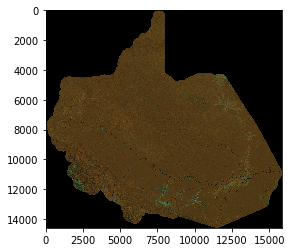

In [38]:
plt.imshow(last_19.permute(1, 2, 0).numpy().astype(int)[:,:,1:4])